In [4]:


sample_recommendation(model, data, [3, 25, 451])


ModuleNotFoundError: No module named 'lightfm'

C:\Users\Govind Jha\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Govind Jha\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


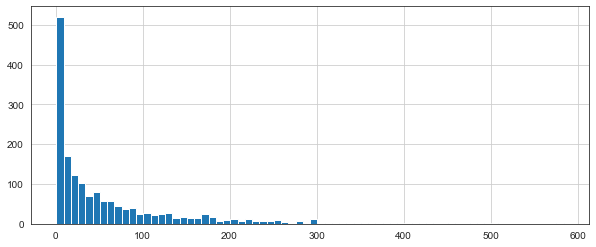

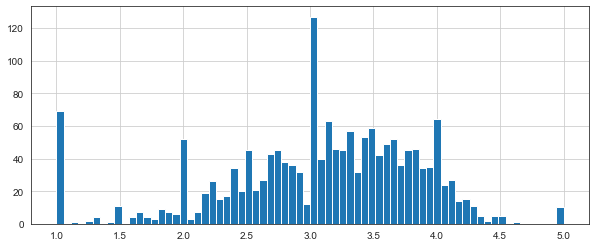

In [18]:

import pandas as pd 

 
column_names = ['user_id', 'item_id', 'rating', 'timestamp'] 

path = 'https://media.geeksforgeeks.org/wp-content/uploads/file.tsv'

df = pd.read_csv(path, sep='\t', names=column_names) 

 
df.head() 

movie_titles = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/Movie_Id_Titles.csv') 
movie_titles.head() 
data = pd.merge(df, movie_titles, on='item_id') 
data.head() 
 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

data.groupby('title')['rating'].count().sort_values(ascending=False).head() 
 
ratings = pd.DataFrame(data.groupby('title')['rating'].mean()) 

ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 

ratings.head() 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('white') 
%matplotlib inline
 
plt.figure(figsize =(10, 4)) 

ratings['num of ratings'].hist(bins = 70)

plt.figure(figsize =(10, 4)) 

ratings['rating'].hist(bins = 70) 

moviemat = data.pivot_table(index ='user_id', 
			columns ='title', values ='rating') 

moviemat.head() 

ratings.sort_values('num of ratings', ascending = False).head(10) 

starwars_user_ratings = moviemat['Star Wars (1977)'] 
liarliar_user_ratings = moviemat['Liar Liar (1997)'] 

starwars_user_ratings.head() 


similar_to_starwars = moviemat.corrwith(starwars_user_ratings) 
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 

corr_starwars.head() 

 
corr_starwars.sort_values('Correlation', ascending = False).head(10) 
corr_starwars = corr_starwars.join(ratings['num of ratings']) 

corr_starwars.head() 

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation']) 
corr_liarliar.dropna(inplace = True) 

corr_liarliar = corr_liarliar.join(ratings['num of ratings']) 
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head() 


